In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [2]:
data = pd.read_csv("/home/jishnu/Desktop/ Data_Sets/null-handeled_outlier-removed_synthetic.csv")

In [3]:
df1 = data.copy()

In [4]:
df1.head()

,Category,Price,Rating,Stock,Discount
0,C,4004.0,3.038293,In Stock,0.0
1,C,1817.0,3.038293,Out of Stock,23.0
2,C,3522.0,3.038293,In Stock,25.0
3,A,2777.0,2.678384,In Stock,6.0
4,A,1151.0,2.947838,In Stock,25.0


In [7]:
df1.shape

(2600, 5)

In [8]:
df1.isnull().sum()

Category    0
Price       0
Rating      0
Stock       0
Discount    0
dtype: int64

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  2600 non-null   object 
 1   Price     2600 non-null   float64
 2   Rating    2600 non-null   float64
 3   Stock     2600 non-null   object 
 4   Discount  2600 non-null   float64
dtypes: float64(3), object(2)
memory usage: 101.7+ KB


In [10]:
c1 = df1.select_dtypes("float")

In [11]:
c1.shape

(2600, 3)

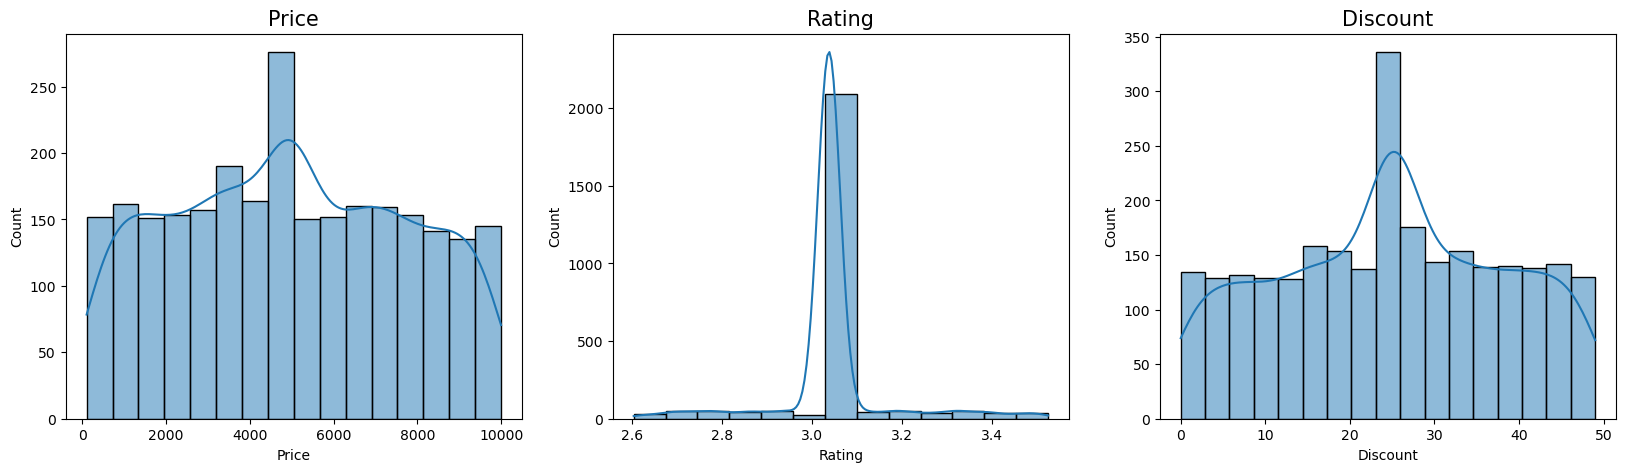

In [13]:
fig,axs = plt.subplots(1,3, figsize = (20,5))

for i in range(3):
    sns.histplot(data = df1, x= c1.columns[i],ax=axs[i],kde= True)
    axs[i].set_title(c1.columns[i],fontsize = 15)
plt.show()

### onehot encoding

In [16]:
c2 = df1.select_dtypes("object")

df1 = pd.get_dummies(df1,columns = c2.columns, dtype = int, drop_first = True)

In [18]:
df1.head()

,Price,Rating,Discount,Category_B,Category_C,Category_D,Stock_Out of Stock
0,4004.0,3.038293,0.0,0,1,0,0
1,1817.0,3.038293,23.0,0,1,0,1
2,3522.0,3.038293,25.0,0,1,0,0
3,2777.0,2.678384,6.0,0,0,0,0
4,1151.0,2.947838,25.0,0,0,0,0


In [19]:
mm = MinMaxScaler()

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               2600 non-null   float64
 1   Rating              2600 non-null   float64
 2   Discount            2600 non-null   float64
 3   Category_B          2600 non-null   int64  
 4   Category_C          2600 non-null   int64  
 5   Category_D          2600 non-null   int64  
 6   Stock_Out of Stock  2600 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 142.3 KB


In [21]:
c3 = df1.select_dtypes("float").columns

df1[c3] = mm.fit_transform(df1[c3])

In [22]:
df1.describe()

,Price,Rating,Discount,Category_B,Category_C,Category_D,Stock_Out of Stock
count,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000
mean,0.490744,0.476873,0.505173,0.085385,0.730000,0.089231,0.342692
std,0.278071,0.130279,0.274358,0.279507,0.444045,0.285131,0.474701
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.263923,0.471282,0.285714,0.000000,0.000000,0.000000,0.000000
50%,0.494593,0.471282,0.510204,0.000000,1.000000,0.000000,0.000000
75%,0.721447,0.471282,0.714286,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### label encoding

In [23]:
df2 = data.copy()

In [24]:
c4 = df2.select_dtypes("object")

In [25]:
c4.nunique()

Category    4
Stock       2
dtype: int64

In [26]:
le = LabelEncoder()

In [28]:
for i in c4.columns:
    df2[i] = le.fit_transform(df2[i])

In [29]:
df2.head()

,Category,Price,Rating,Stock,Discount
0,2,4004.0,3.038293,0,0.0
1,2,1817.0,3.038293,1,23.0
2,2,3522.0,3.038293,0,25.0
3,0,2777.0,2.678384,0,6.0
4,0,1151.0,2.947838,0,25.0


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  2600 non-null   int64  
 1   Price     2600 non-null   float64
 2   Rating    2600 non-null   float64
 3   Stock     2600 non-null   int64  
 4   Discount  2600 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 101.7 KB


In [32]:
c5 = df2.select_dtypes("float").columns

df2[c5] = mm.fit_transform(df2[c5])

In [33]:
df2.head()

,Category,Price,Rating,Stock,Discount
0,2,0.394279,0.471282,0,0.000000
1,2,0.173236,0.471282,1,0.469388
2,2,0.345563,0.471282,0,0.510204
3,0,0.270265,0.080885,0,0.122449
4,0,0.105923,0.373165,0,0.510204


In [34]:
df2.describe()

,Category,Price,Rating,Stock,Discount
count,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000
mean,1.813077,0.490744,0.476873,0.342692,0.505173
std,0.722090,0.278071,0.130279,0.474701,0.274358
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.263923,0.471282,0.000000,0.285714
50%,2.000000,0.494593,0.471282,0.000000,0.510204
75%,2.000000,0.721447,0.471282,1.000000,0.714286
max,3.000000,1.000000,1.000000,1.000000,1.000000


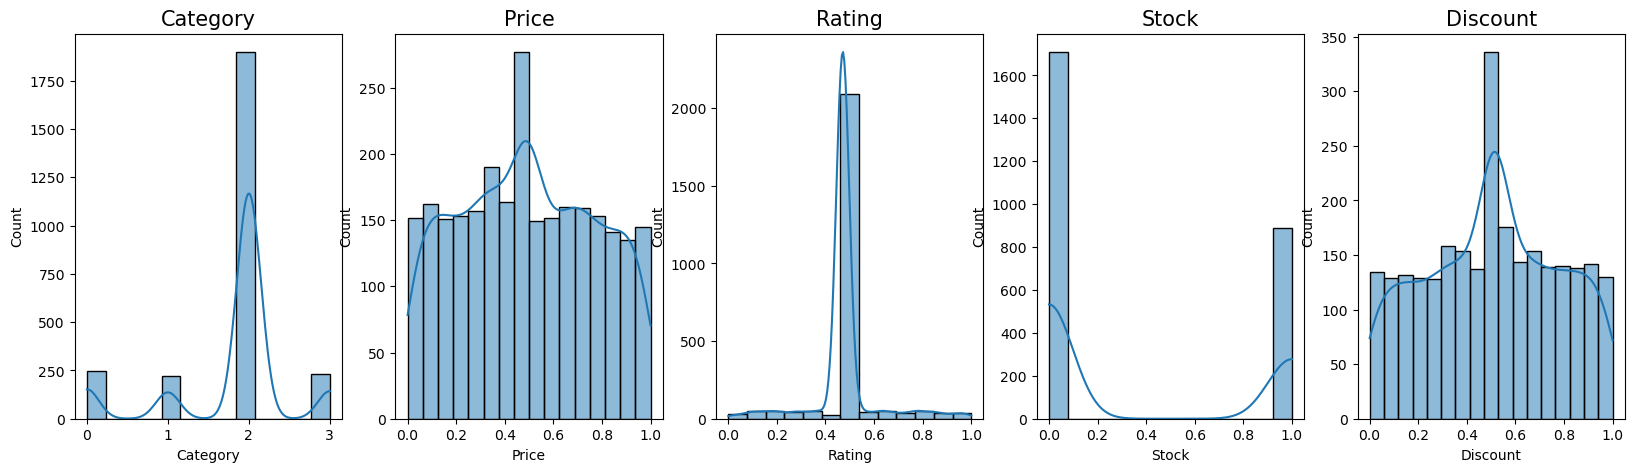

In [35]:
fig,axs = plt.subplots(1,5, figsize = (20,5))

for i in range(5):
    sns.histplot(data = df2, x= df2.columns[i],ax=axs[i],kde= True)
    axs[i].set_title(df2.columns[i],fontsize = 15)
plt.show()

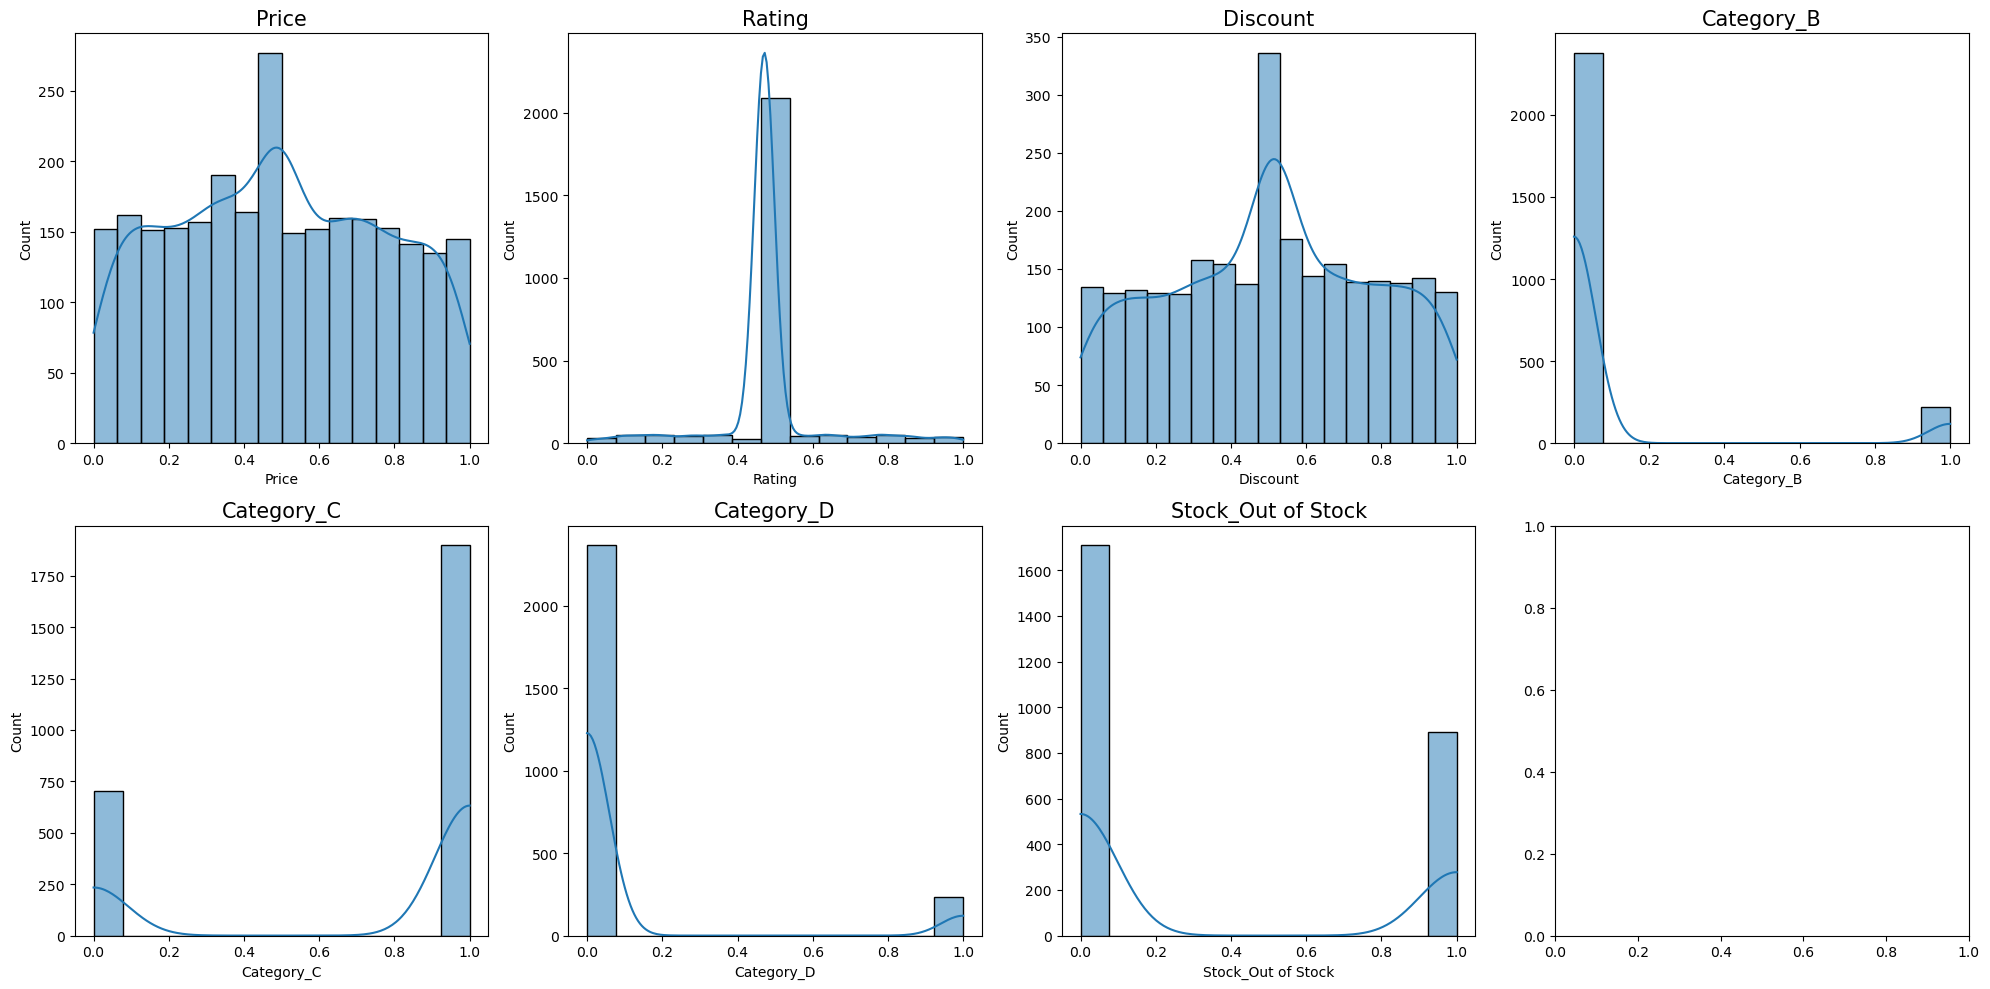

In [40]:
fig,axs = plt.subplots(2,4, figsize = (20,10))
axs = axs.flatten()
for i in range(7):
    sns.histplot(data = df1, x= df1.columns[i],ax=axs[i],kde= True)
    axs[i].set_title(df1.columns[i],fontsize = 15)
plt.tight_layout()
plt.show()